### Trying the sentiment analyzer in TextBlob

In this notebook I will try to see if TextBlob works better than VADER for sentiment analysis (whether I get different results or more comprehensive findings).
* `TextBlob` is a Python NLP processor that builds on top of NLTK.

* One of the components is a sentiment analyzer that has two modes:
    1. a lexical approach using a lexicon of adjectives scored for subjectivity
    2. a machine learning classifier approach (using Naive Bayes algorithm) trained on the Movie Review corpus
    
    
* I wonder if this tool might be a better fit to my corpora than VADER

In [1]:
import json

import seaborn as sns
import numpy as np
import textblob
from textblob.sentiments import NaiveBayesAnalyzer

from nltk.sentiment import SentimentIntensityAnalyzer

#### Load data

In [2]:
nexis_host = json.load(open('../data/critic_reviews/nexis_host_critic.json'))
nexis_parasite = json.load(open('../data/critic_reviews/nexis_parasite_critic.json'))

### Set up SA tools

* VADER
* TextBlob

In [3]:
sid = SentimentIntensityAnalyzer()

Looking at The Host first:

In [4]:
# TextBlob
# mode 1 (intensity)
tb1=textblob.TextBlob(nexis_host[0]['text'])

# mode 2 (classifier trained on reviews)
tb2=textblob.TextBlob(nexis_host[0]['text'], analyzer=NaiveBayesAnalyzer())

In [5]:
tb1.sentiment

Sentiment(polarity=0.0825819203944204, subjectivity=0.4820716089466091)

* Mode 1 gives a polarity and subjectivity score

* And in this mode you can also see the words that are driving the score

In [6]:
tb1.sentiment_assessments

Sentiment(polarity=0.0825819203944204, subjectivity=0.4820716089466091, assessments=[(['american'], 0.0, 0.0, None), (['public'], 0.0, 0.06666666666666667, None), (['lively'], 0.13636363636363635, 0.5, None), (['average'], -0.15, 0.39999999999999997, None), (['american'], 0.0, 0.0, None), (['good'], 0.7, 0.6000000000000001, None), (['finally'], 0.0, 1.0, None), (['common'], -0.3, 0.5, None), (['giant'], 0.0, 1.0, None), (['tries'], -0.1, 0.4, None), (['kind'], 0.6, 0.9, None), (['able'], 0.5, 0.625, None), (['same'], 0.0, 0.125, None), (['thanks'], 0.2, 0.2, None), (['sure'], 0.5, 0.8888888888888888, None), (['giant'], 0.0, 1.0, None), (['american'], 0.0, 0.0, None), (['several'], 0.0, 0.0, None), (['dusty'], -0.4, 0.6, None), (['present'], 0.0, 0.0, None), (['fine'], 0.4166666666666667, 0.5, None), (['whole'], 0.2, 0.4, None), (['first'], 0.25, 0.3333333333333333, None), (['casually'], -0.5000000000000001, 0.8666666666666667, None), (['left'], 0.0, 0.0, None), (['full'], 0.35, 0.55, N

In [7]:
tb2.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=1.9087236869021277e-29)

* Mode 2 gives a label (`pos`/`neg`) and a confidence/probalility score)

* So then you could create a dictionary:

In [8]:
tb_score = {
            'tb_polarity': tb1.sentiment.polarity, 
            'tb_subjectivity': tb1.sentiment.subjectivity,
            'tb_class': tb2.sentiment.classification,
            'tb_prob_pos': tb2.sentiment.p_pos
           }

In [9]:
tb_score

{'tb_class': 'pos',
 'tb_polarity': 0.0825819203944204,
 'tb_prob_pos': 1.0,
 'tb_subjectivity': 0.4820716089466091}

* Compare with VADER

In [10]:
sid.polarity_scores(nexis_host[0]['text'])

{'compound': -0.6895, 'neg': 0.09, 'neu': 0.815, 'pos': 0.094}

In [11]:
# Looking at that review:

nexis_host[0]['text']

'Mar. 8, 2007 (Blogcritics.org delivered by Newstex) -- \n If there.s one film that will plant South Korean cinema into the mind of the American public, The Host is it. Bong Joon-ho.s lively feature provides all the thrills and sensation of the average American summer spectacle, except that it does so while still remaining a good movie. It.s got heart, hilarity, triumph and tragedy as it gives us a fractured family that finally sets aside their differences and unites towards a common goal. It.s also got a giant mutant fish-monster that tries to eat everything in its path.\n\nStill with me? That.s the kind of film that The Host is - able to shift tones on a moment.s notice (often within the same scene), Bong uses all his formidable talents to bring respect to a disreputable genre. And thanks to his sure hand, somehow it all comes together.\n\nThe genesis of this giant mutant fish-monster comes in the year 2000 prologue, when an American government official, over the objections of his Ko

So that's a pretty big difference. For the same review, we see that the TextBlob analysis shows it as a positive sentiment review, and it's very confident/probable (`tb_prob_pos` = 1.0). And then we look at the VADER results, and it shows that review as having a compound sentiment score of -0.6895. So, this means VADER really isn't doing the best job! Especially because that first review was not that negative, after reading some of the text above!

So let's do the same process, but now for the whole list of `nexis_host`:

In [12]:
# use TextBlob for whole critic rev document list
# make dictionary, add in the label and scores, and add this dict to a list:

tb_host = []

for rev in nexis_host:
    tb1 = textblob.TextBlob(rev['text'])
    tb2 = textblob.TextBlob(rev['text'], analyzer = NaiveBayesAnalyzer())
    tb_score = {
        'tb_polarity_host' : tb1.sentiment.polarity,
        'tb_subjectivity_host' : tb1.sentiment.subjectivity,
        'tb_class_host' : tb2.sentiment.classification,
        'tb_prob_pos_host' : tb2.sentiment.p_pos
    }
    tb_host.append(tb_score)

Great, now let's take a look at the first 3 critic reviews:

In [13]:
tb_host[:3]

[{'tb_class_host': 'pos',
  'tb_polarity_host': 0.0825819203944204,
  'tb_prob_pos_host': 1.0,
  'tb_subjectivity_host': 0.4820716089466091},
 {'tb_class_host': 'pos',
  'tb_polarity_host': 0.03815231152495305,
  'tb_prob_pos_host': 1.0,
  'tb_subjectivity_host': 0.5624783549783549},
 {'tb_class_host': 'pos',
  'tb_polarity_host': 0.03232905500141327,
  'tb_prob_pos_host': 1.0,
  'tb_subjectivity_host': 0.3851694410972762}]

Just based on these 3 above, all of them have been classified as `pos` sentiment, and we can compare these 3 to VADER results again, because I'm curious:

In [14]:
vader_host = []

for rev in nexis_host:
    scores = sid.polarity_scores(rev['text'])
    vader_host.append(scores)

In [15]:
vader_host[:3]

[{'compound': -0.6895, 'neg': 0.09, 'neu': 0.815, 'pos': 0.094},
 {'compound': -0.0268, 'neg': 0.085, 'neu': 0.829, 'pos': 0.086},
 {'compound': -0.9949, 'neg': 0.118, 'neu': 0.805, 'pos': 0.076}]

Yup, this shows us the limitations of VADER. It doesn't pick up the context, it only looks at individual words, so it won't give us a very accurate view of the sentiment. All of the first 3 reviews were classified as positive from TextBlob, but all of them show up negative compound sentiment scores when using the VADER tool. 

Now that we know this, let's do the same process with _Parasite_ critic reviews:

### Same process with _Parasite_ critic reviews:

In [16]:
# use TextBlob for whole critic rev document list
# make dictionary, add in the label and scores, and add this dict to a list:

tb_ps = []

for rev in nexis_parasite:
    tb1 = textblob.TextBlob(rev['text'])
    tb2 = textblob.TextBlob(rev['text'], analyzer = NaiveBayesAnalyzer())
    tb_score = {
        'tb_polarity_ps' : tb1.sentiment.polarity,
        'tb_subjectivity_ps' : tb1.sentiment.subjectivity,
        'tb_class_ps' : tb2.sentiment.classification,
        'tb_prob_pos_ps' : tb2.sentiment.p_pos
    }
    tb_ps.append(tb_score)

Looking at the first few items in our new list:

In [17]:
tb_ps[:3]

[{'tb_class_ps': 'pos',
  'tb_polarity_ps': 0.13687327823691461,
  'tb_prob_pos_ps': 1.0,
  'tb_subjectivity_ps': 0.44578971533516987},
 {'tb_class_ps': 'pos',
  'tb_polarity_ps': 0.15391450216450217,
  'tb_prob_pos_ps': 1.0,
  'tb_subjectivity_ps': 0.5154682539682541},
 {'tb_class_ps': 'pos',
  'tb_polarity_ps': 0.13007865646258504,
  'tb_prob_pos_ps': 0.9999999998011833,
  'tb_subjectivity_ps': 0.5135331632653062}]

Same thing as above, let's compare with VADER:

In [18]:
vader_ps = []

for rev in nexis_parasite:
    scores = sid.polarity_scores(rev['text'])
    vader_ps.append(scores)

In [19]:
vader_ps[:3]

[{'compound': 0.9894, 'neg': 0.044, 'neu': 0.855, 'pos': 0.101},
 {'compound': 0.9958, 'neg': 0.049, 'neu': 0.836, 'pos': 0.115},
 {'compound': 0.9774, 'neg': 0.052, 'neu': 0.864, 'pos': 0.085}]

Well that's really fascinating!! It looks like for these reviews, both tools (TextBlob and VADER) seem to work! TextBlob tells us that the first 3 are classified as positive sentiment, and VADER also has high compound sentiment scores. 

What I want to do now is to create some sort of visual to display the counts of positively classified critic reviews of _The Host_ vs. those of _Parasite_ :

In [20]:
class_host = []

for item in tb_host:
    class_host.append(item['tb_class_host'])

In [21]:
class_host

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos']

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

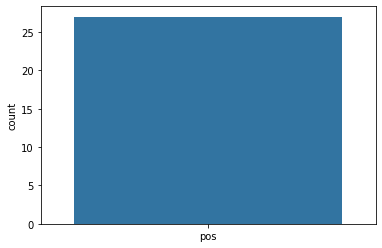

In [22]:
# Using seaborn to display results:

sns.countplot(class_host)

Well, it looks like all of the reviews are positive...Which does not tell us much to be honest. Let's try doing the same thing for reviews of _Parasite_ 

In [23]:
class_ps = []

for item in tb_ps:
    class_ps.append(item['tb_class_ps'])

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

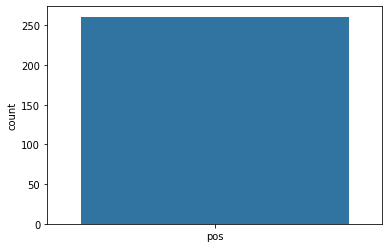

In [24]:
sns.countplot(class_ps)

Okay, this has the same results. All of the critic reviews are positive. This doesn't tell us much about the data, so let's see if something else can give us more insight.

Moving on, let's try looking at mean polarity scores:

In [25]:
sum([review['tb_polarity_host'] for review in tb_host])/ len(tb_host)

0.05794903438879061

In [26]:
sum([review['tb_polarity_ps'] for review in tb_ps])/ len(tb_ps)

0.19022014280174124

The polarity scores give us scores from -1 to 1, where negative scores indicate negative sentiment and positive scores greater than 0 indicate positive sentiment. Based on this, it does look like the reviews of _The Host_ have less positive sentiment than that of _Parasite_ but the difference is minimal. They're within 0.2 of each other. 

Next, we're exploring what else TextBlob can do. But in terms of my analysis and information for my data story, I want to focus on what we've done above. 

### Sub-document units (i.e. sentences)

* TextBlob also does sentence segmentation and can be used to score sentiment at that level.

* Here we can find sentences that have a polarity < -0.1

In [27]:
[(s.string, s.sentiment) for s in tb1.sentences if s.sentiment.polarity<-0.1]

[("Related stories from TheWrap: 'Bad Boys' Rides High Again at Box Office While 'Dolittle' Crashes[1]'Little Women' Could Help the Oscars Break a Box Office Drought[2]'Star Wars: The Rise of Skywalker' Set to Cross $1 Billion at Global Box Office[3] [ 1]: https://www.thewrap.com/bad-boys-rides-high-again-at-box-office-while-dolittle-crashes-will-smith-martin-lawrence/ [ 2]:       \xa0    https://www.thewrap.com/little-women-could-help-the-oscars-break-a-box-office-drought/ [ 3]:       \xa0    https://www.thewrap.com/star-wars-the-rise-of-skywalker-set-to-cross-1-billion-at-global-box-office/",
  Sentiment(polarity=-0.12124999999999997, subjectivity=0.3511111111111111))]

* Or above 0.3 

In [28]:
[(s.string, s.sentiment) for s in tb1.sentences if s.sentiment.polarity>0.3]

[("Jan 19, 2020( The Wrap: http://www.thewrap.com/ Delivered by Newstex)  Several Best Picture Oscar contenders got a box office boost from their nominations this weekend, including NEON's 'Parasite' and Searchlight's 'Jojo Rabbit,' both of which had their theater counts significantly expanded to accommodate renewed audience interest.",
  Sentiment(polarity=0.4583333333333333, subjectivity=0.39166666666666666)),
 ('The Bong Joon-ho film became the first Korean movie ever to earn a nomination for Best Picture and took six nominations in all, including Best International Film, Best Director and Best Original Screenplay.',
  Sentiment(polarity=0.6607142857142857, subjectivity=0.3261904761904762)),
 ("'Jojo Rabbit' was one of two films that Scarlett Johansson earned Oscar nominations for, taking a Best Supporting Actress nod for her work here to go with her Best Actress nod for 'Marriage Story.",
  Sentiment(polarity=0.75, subjectivity=0.2833333333333334)),
 ("'Jojo' took six nominations o

### Making a distribution by sentence

Reminder, this is just for one critic review, the first one in the list of `nexis_host`:

In [29]:
sp = [s.sentiment.polarity for s in tb1.sentences ]

In [30]:
sp

[0.4583333333333333,
 0.05,
 0.6607142857142857,
 0.0,
 0.0,
 0.75,
 0.5,
 0.06818181818181818,
 0.10212121212121213,
 -0.12124999999999997]

In [31]:
np.mean(sp)

0.2468100649350649

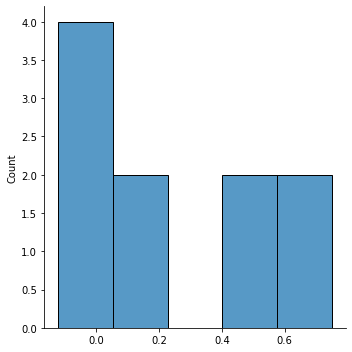

In [32]:
sns.displot(sp)

Above is the distribution of each sentence's polarity scores in that same review.

We can also look at the count of sentiment classification (pos or neg) for each sentence, and then make a chart based on that to show whether the review has more pos classified sentences or neg:

In [33]:
sent_class = [s.sentiment.classification for s in tb2.sentences]

In [34]:
sent_class

['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

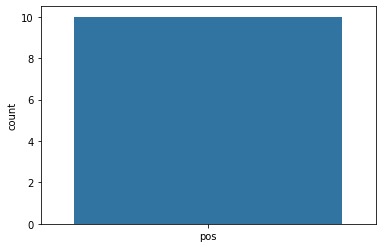

In [35]:
sns.countplot(sent_class)

This is compiling the classification of each sentence.

## Conclusion

In this notebook, I explored using TextBlob for sentiment analysis. Although it seems to work a bit better than VADER, it looks like for my data, the differences shown are minimal. It might also have to do with the fact that there's such a large discrepancy between the size of the data files (27 of Host vs. 261 of Parasite), which in and of itself is an intriguing observation. 

Overall, the results of TextBlob tell us that sentiment analysis is not as clear-cut and precise as we sometimes think it will be. VADER and TextBlob both have their limitations, nothing is perfect! In that case, I will stick to what I have discovered with using VADER for sentiment analysis. If you want to see that process of using VADER, please refer to `analysis_critic_nexis`. Thank you!